<a href="https://colab.research.google.com/github/fursuf1/Credit-Card-Fraud-Detection/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets
!pip install kaggle

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [4]:
# Import the necessary module requred to upload the json file containing the user's Kaggle username and API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smwares","key":"9d4510dd154cd14320d909c8ea824582"}'}

In [5]:
# Make the directory necessar to place the Kaggle json credentials file. RUN THIS ONLY ONCE PER SESSION
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Download the CC data set from Kaggle
od.download("https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

100%|██████████| 143M/143M [00:04<00:00, 34.0MB/s]


In [7]:
# Import data as DataFrame
cc = pd.read_csv('./credit-card-fraud-detection-dataset-2023/creditcard_2023.csv', index_col=0)

In [8]:
# Preview the dataframe
cc

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1


In [9]:
# Get some descriptive stats on the dataframe
cc.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [58]:
# Create target and feature dataframes
X = cc.drop('Class', axis=1)
y = cc['Class']

In [57]:
# Import the necessary scikit-learn modules for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [61]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [62]:
# Train the model using logistic regression, solver set to Newton-CG, n_jobs set to -1 so that all cores available are used
logistic_regression = LogisticRegression(solver='newton-cg', n_jobs=-1)
logistic_regression.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, solver='newton-cg')

In [63]:
# Predict fraud using the newly created model on the test set for comparison
y_pred = logistic_regression.predict(X_test)

In [64]:
# Evaluate the results
print(metrics.accuracy_score(y_test, y_pred))

0.964924467579973


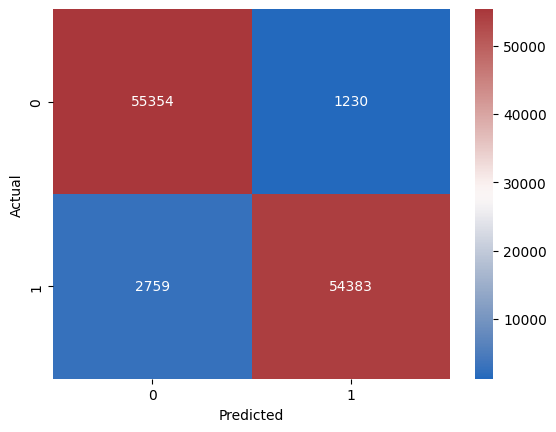

In [65]:
# Print a confusion matrix
cc_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cc_confusion_matrix, annot=True, annot_kws={'size': 10}, cmap='vlag', fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [66]:
# Get the four values from the confusion matrix for calculating sensitivity, specificity, precision, etc
tp = cc_confusion_matrix[0,0]
fn = cc_confusion_matrix[0,1]
fp = cc_confusion_matrix[1,0]
tn = cc_confusion_matrix[1,1]

In [67]:
# Sensitivity (true positive rate)
tpr = tp / (tp + fn)

# Specificity (true negative rate)
tnr = tn / (tn + fp)

# Precision (positive predictive value)
ppv = tp / (tp + fp)

# Negative predictive value
npv = tn / (tn + fn)

# Miss rate (false negative rate)
fnr = fn / (fn + tp)

# Fall-out (false positive rate)
fpr = fp / (fp + tn)

# False discovery rate
fdr = fp / (fp + tp)

# False omission rate
fomr = fn / (fn + tn)

In [68]:
print("Sensitivity (true positive rate):", tpr)
print("Specificity (true negative rate):", tnr)
print("Precision (positive predictive value):", ppv)
print("Negative predictive value:", npv)
print("Miss rate (false negative rate)", fnr)
print("Fall-out (false positive rate)", fpr)
print("False discovery rate", fdr)
print("False omission rate", fomr)

Sensitivity (true positive rate): 0.978262406333946
Specificity (true negative rate): 0.9517167757516363
Precision (positive predictive value): 0.9525235317398861
Negative predictive value: 0.9778828691133368
Miss rate (false negative rate) 0.021737593666054007
Fall-out (false positive rate) 0.048283224248363725
False discovery rate 0.04747646826011392
False omission rate 0.02211713088666319


In [51]:
# Logistic regression using the statsmodels module
import statsmodels.api as sm

In [69]:
# Fitting the model (adding the constant to X in one line so as to keep X as it is)
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.094268
         Iterations 13


In [70]:
# Summarize the result
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               454904
Model:                          Logit   Df Residuals:                   454874
Method:                           MLE   Df Model:                           29
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                  0.8640
Time:                        23:20:05   Log-Likelihood:                -42883.
converged:                       True   LL-Null:                   -3.1532e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9913      0.093     96.183      0.000       8.808       9.175
V1            -0.6862      0.021    -32.707      0.000      -0.727      -0.645
V2             0.1527      0.018      8.318      0.0

In [71]:
# Predict results based on test data set
y_pred2 = result.predict(sm.add_constant(X_test))

In [72]:
y_pred2

id
404558    0.735056
472650    1.000000
441536    1.000000
279614    0.005775
531919    1.000000
            ...   
328798    1.000000
294472    1.000000
280780    0.004689
14823     0.016989
268709    0.001165
Length: 113726, dtype: float64

In [74]:
# Values are in between 0 and 1 instead of 0 and 1, so change all values above 0.5 to 1, below or equal to 0.5 to 0
y_pred2 = np.where(y_pred2 > 0.5, 1, 0)

In [75]:
y_pred2

array([1, 1, 1, ..., 0, 0, 0])

In [76]:
# Print the accuracy score
print(accuracy_score(y_test, y_pred2))

0.964933260644004


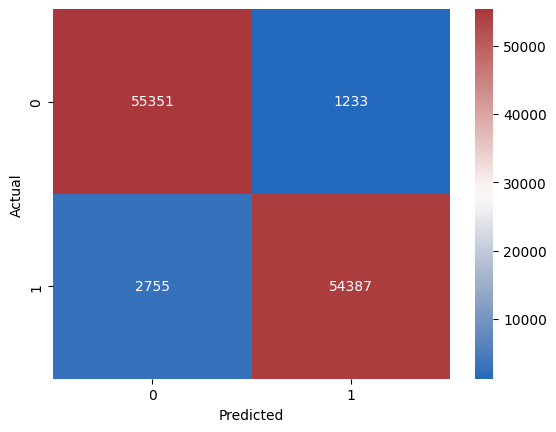

In [77]:
# Print a confusion matrix
cc_confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
sns.heatmap(cc_confusion_matrix2, annot=True, annot_kws={'size': 10}, cmap='vlag', fmt='g')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()